### Evaluating and visualizing NAAF-adjusted taxonomic peptide composition Trocas 7 incubations

#### Beginning with: phylum-level LCA assigments adjusted by NAAF factor in csv, manually created from LCA NAAF csvs

#### Goal: heatmaps and stacked bar plot peptide contributions for each station at both timepoints

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from functools import reduce

In [2]:
# rearranged and condensed the csv manually in Libre Calc
# all peptide counts adjusted by NAAF numerators and sample denominator
# read in new csv:

phy_NAAF = pd.read_csv("/home/millieginty/Documents/git-repos/amazon/analyses/T7-incubations/unipept/lca/NAAF/CV_phylum_naaf_sorted.csv", index_col=0)

phy_NAAF.head()

,Time 0 small,Time 0 large,Time 24 small,Time 24 large
phylum,,,,
Proteobacteria,17.459511,25.428598,16.952428,18.341978
Actinobacteria,82.210317,73.630348,83.010647,81.412453
Firmicutes,0.012513,0.000000,0.013654,0.012660
Planctomycetes,0.191484,0.479921,0.000000,0.000000
Bacteroidetes,0.087379,0.009550,0.008218,0.012995


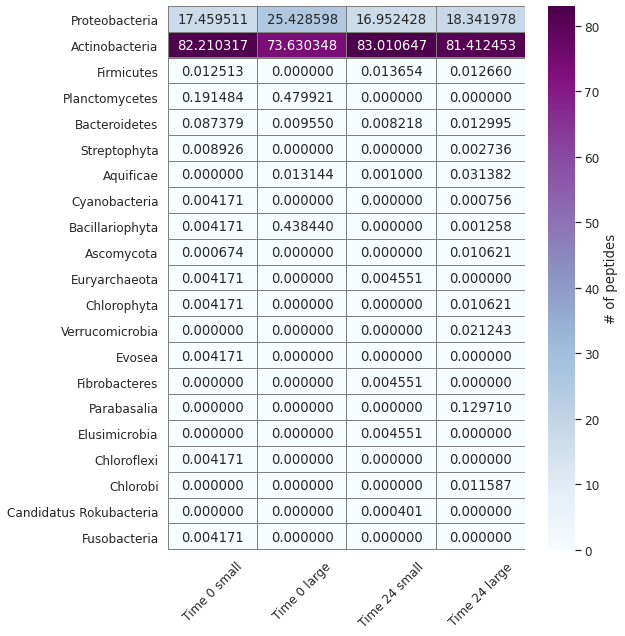

In [3]:
sns.set(font_scale=1.1)  

fig, ax = plt.subplots(figsize=(8,10))

ax = sns.heatmap(phy_NAAF, cmap="BuPu", annot=True, fmt='f', linecolor = 'grey', linewidths=.01, \
                square=False, cbar_kws={'label': '# of peptides'}, label='big')

ax.set_ylabel('')

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)
    

for item in ax.get_xticklabels():
    item.set_rotation(45)

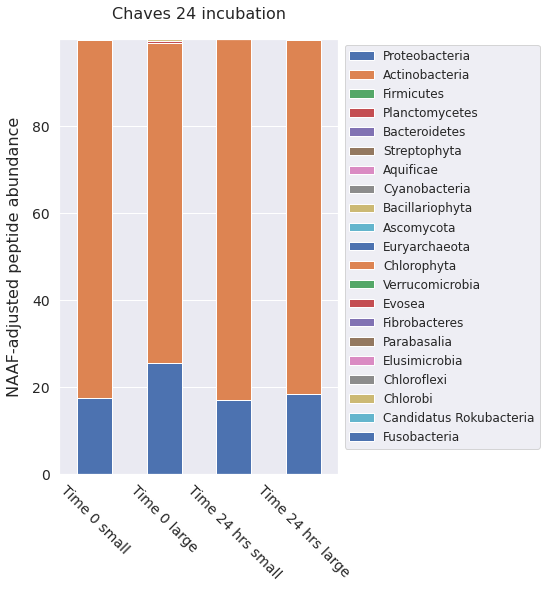

In [5]:
phy_TNAAF = phy_NAAF.transpose()

ax = phy_TNAAF.plot(kind='bar',stacked=True, figsize = (5,8))

#ax.set_xlabel("Rot progression", fontsize = 16)

ax.set_ylabel("NAAF-adjusted peptide abundance", labelpad=10, fontsize = 16)

labels = ['Time 0 small', 'Time 0 large', 'Time 24 hrs small', 'Time 24 hrs large']

ax.set_xticklabels(labels, rotation = -45, size = 14)
plt.yticks(fontsize=14)

plt.title("Chaves 24 incubation", size = 16, pad = 20)

plt.legend(bbox_to_anchor=(1,1), loc="upper left")